# 1. Introduction
## 1.1 Background and Objectives

The background of our analysis is based on Bankrate's established role in the financial industry since 1976, with a particular focus on enhancing the tools and content that assist over 100 million consumers annually in making better financial decisions. Specifically, our analysis targets the optimization of the loan matching process between individual customers and Bankrate's lending partners, aiming to maximize both the likelihood of loan approval and the revenue per approved loan application.

The purpose of this analysis is to utilize predictive modeling and detailed data analysis to ascertain the most significant variables influencing loan approval rates among customers. By identifying these variables, Bankrate aims to strategically match customers with the most suitable lender among its partners—Lender A, B, and C—who offer varying commissions per approval. This targeted matching is expected to not only increase approval rates but also enhance the overall revenue generated per application, aligning customer profiles with lenders' preferences efficiently.

## 1.2 Structure of Analysis

There are mainly four parts in the following part of this analysis report. Here is the brief introduction of each part.

1. **Preparation Work**: In the initial phase, I import all necessary analytical tools and datasets. This step includes gaining a fundamental understanding of the variables involved, setting the stage for a deeper dive into the data.
2. **Exploration and Initial Regression Analysis**: The second part involves a comprehensive exploration of the entire dataset, examining both dependent and independent variables. I conduct a logistic regression analysis to begin identifying patterns and factors that influence the likelihood of loan approval.
3. **Lender-Specific Analysi**s: In the third section, I focus on analyzing the data by specific lenders, which includes descriptive analytics and logistic regression grouped by each lender. This helps in understanding the differences in approval criteria and behavior between Lender A, B, and C.
4. **Development of New Matching Method and Revenue Calculation**: The final part of the analysis leverages the insights gained from the grouped logistic regression to propose a new matching method. Using this refined approach, I calculate the potential increase in revenue by optimally aligning customers with the most suitable lenders based on the predicted approval probabilities and lender-specific returns per approval.


## 1.3 Useful Insights

1. **Low Approval Rates Indicating Room for Improvement**: The current proportion of loan approvals is relatively low (11%), highlighting significant opportunities for enhancing the loan matching process to increase approval rates.

2. **Key Variables Influencing Loan Approval**: In the overall model, several variables significantly influence the likelihood of loan approval. Important factors include the customer's FICO score, monthly gross income, and employment status, which all have a strong predictive power regarding loan approval. Conversely, variables such as the reason for the loan may be less impactful, indicating areas where data collection could be streamlined or focused.

3. **Differences and Similarities Among Lenders**: Each lender has distinct approval criteria, but there are commonalities such as the emphasis on creditworthiness (FICO scores) and income stability. Lender C stands out as being more comprehensive in its evaluation, considering a broader range of variables than Lenders A and B, potentially appealing to a wider range of customers.

4. **Revenue Increase from Optimal Lender Matching**: Based on the analysis, adopting a more strategic approach to matching customers with the optimal lender can significantly increase revenue. Initial estimates suggest that this targeted matching method could yield a substantial increase in revenue per application, increasing total revenue by 913,632 dollars.

5. **Considerations for the New Matching Method**: While the new method proposes considerable advantages, there are factors to consider, such as ensuring that customer preferences and satisfaction are maintained. Moreover, operational feasibility and the adaptation of current systems to support real-time data processing and decision-making need to be addressed to successfully implement the new strategy.

# 2. Preparation Work

To complete the analysis, I choose Python because we can analyze dataframe easily in Python to present data visualization and to apply statistical models. I import the packages I will use in this part and read the .xlsx file.

This dataset comprises records of 100,000 loan applications, encompassing a mix of both numerical and categorical data across 14 distinct columns. Key attributes include personal and financial information such as loan amount, FICO score, employment status, and monthly gross income, alongside the lender to whom each application was submitted and the outcome of the application (approved or not).

In [89]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, log_loss

In [90]:
# Read the data
df = pd.read_excel('Pre-Super_Day_candidate_dataset__28candidate_29.xlsx',engine='openpyxl')

In [91]:
# Display part of the data
df.head(5)

,User ID,applications,Reason,Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,bounty
0,00007820-89cb-4c1d-9940-eb270d605a35,1,cover_an_unexpected_cost,100000,669,fair,full_time,consumer_discretionary,5024,927,0,B,0,0
1,00012b55-514c-421e-9c76-3300abbc1134,1,credit_card_refinancing,70000,594,fair,full_time,information_technology,5764,1177,0,B,0,0
2,000157c1-b6a3-4c86-82c7-9ec1bda3799a,1,home_improvement,10000,596,fair,full_time,information_technology,4017,1487,0,A,0,0
3,00020400-efab-4b10-8812-2a0aaf774841,1,home_improvement,100000,642,fair,part_time,energy,3129,904,0,A,0,0
4,0002f737-0cda-48fb-91ed-533f3d0eab05,1,major_purchase,30000,642,fair,full_time,energy,4220,1620,0,A,0,0


In [92]:
# Structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User ID                     100000 non-null  object
 1   applications                100000 non-null  int64 
 2   Reason                      100000 non-null  object
 3   Loan_Amount                 100000 non-null  int64 
 4   FICO_score                  100000 non-null  int64 
 5   Fico_Score_group            100000 non-null  object
 6   Employment_Status           100000 non-null  object
 7   Employment_Sector           93593 non-null   object
 8   Monthly_Gross_Income        100000 non-null  int64 
 9   Monthly_Housing_Payment     100000 non-null  int64 
 10  Ever_Bankrupt_or_Foreclose  100000 non-null  int64 
 11  Lender                      100000 non-null  object
 12  Approved                    100000 non-null  int64 
 13  bounty                      10

# 3. Variables Relationship with Approvability

First of all, we want to explore the variables relationship with approvability for the whole dataset. I did some variable exploration at the beginning, and then choose part of the variables to fit a logistic regression model.

Logistic regression is an effective statistical method for exploring factors that influence loan approval decisions because it's specifically designed to handle binary outcomes — such as whether a loan is approved (1) or not approved (0). This type of regression allows us to estimate the probability of a particular outcome based on input variables, such as FICO scores, income levels, and employment status. By analyzing these probabilities, logistic regression helps us understand which factors are significant predictors of loan approval.

## 3.1 Data Exploration and Visualization
### Distribution of dependent variable

To start with, I use a bar chart displays the distribution of approval statuses for loan applications. It shows a significant difference in counts between approved and not approved applications. Specifically, there are 89,024 applications that were not approved (represented by the blue bar labeled "0") and 10,976 applications that were approved (represented by the orange bar labeled "1"). This visualization highlights that a much smaller portion of the applications result in approval compared to those that are declined.

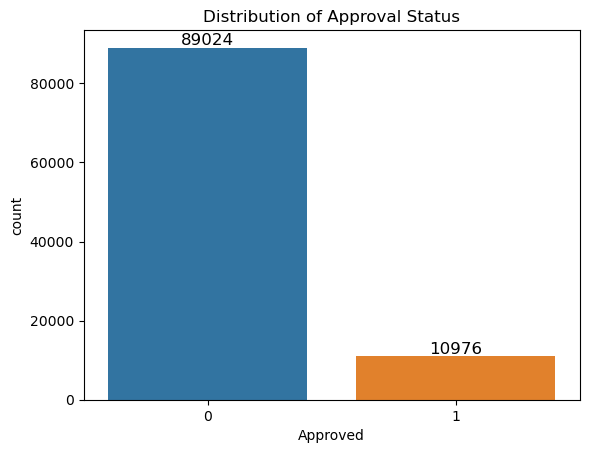

In [93]:
# Check the distribution of dependent variable: Approval
ax = sns.countplot(x='Approved', data=df)
plt.title('Distribution of Approval Status')

# Add labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

### Numeric variables

There are several numerical independent variables that may affect the approval result. I checked their distribution at first and then calculate their correlation. According to the following histogram, we can conclude:

- **Loan Amount**: The distribution shows multiple peaks, indicating that loan amounts are commonly clustered around specific values. The highest frequency is observed around mid-range values, with fewer loans requested at the highest and lowest ends.
- **FICO Score**: This histogram has a bell-shaped distribution skewed towards higher scores, suggesting that a significant number of applicants have good credit ratings, with fewer applicants having lower scores.
- **Monthly Gross Income**: The distribution is right-skewed, indicating that most applicants have lower to middle monthly incomes, with a rapid decline in frequency as income increases.

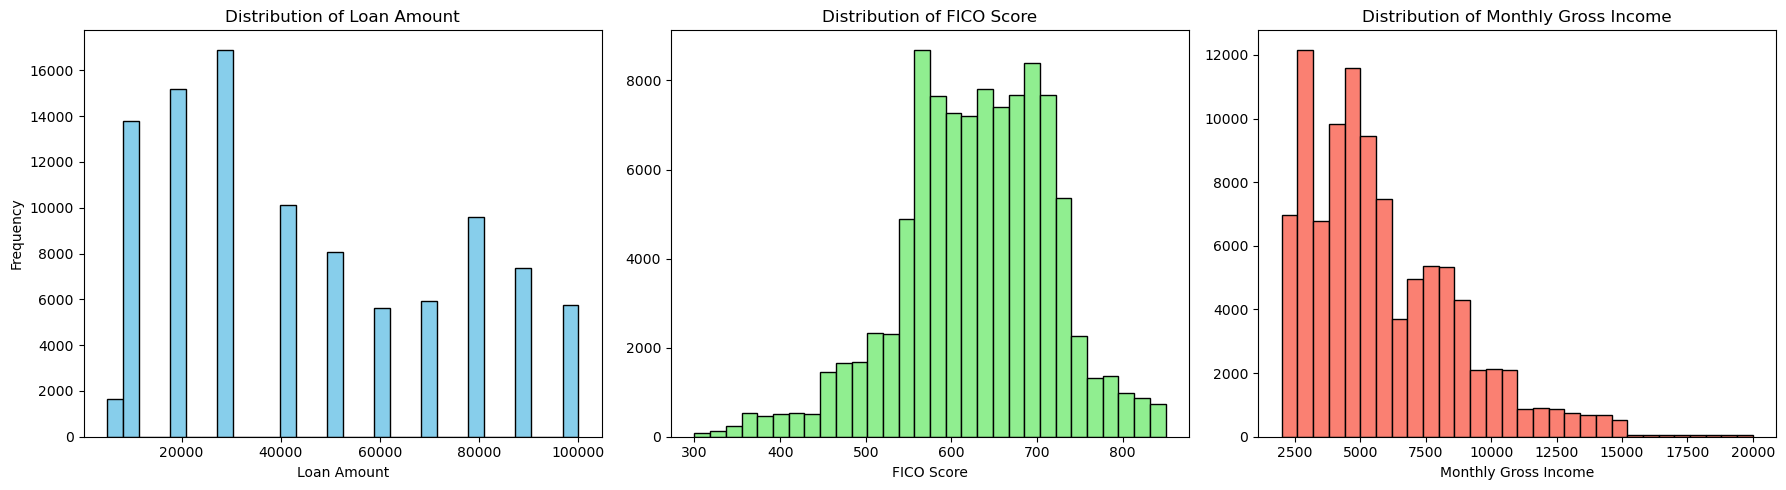

In [94]:
# Distribution of numeric independent variables: Loan_Amount, FICO_score, Monthly_Gross_Income
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loan Amount
axes[0].hist(df['Loan_Amount'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Loan Amount')
axes[0].set_xlabel('Loan Amount')
axes[0].set_ylabel('Frequency')

# FICO Score
axes[1].hist(df['FICO_score'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution of FICO Score')
axes[1].set_xlabel('FICO Score')

# Monthly Gross Income
axes[2].hist(df['Monthly_Gross_Income'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Distribution of Monthly Gross Income')
axes[2].set_xlabel('Monthly Gross Income')

# Show the plots
plt.tight_layout()
plt.show()

To analyze the relationship of these variable and their correlation with approval, I create this heat map. We can get several conclusion from it.

- **Loan Amount and Approval**: The correlation is very weakly negative (-0.04), indicating almost no linear relationship.
- **FICO Score and Approval**: A moderate positive correlation (0.27) suggests that higher FICO scores might slightly increase the likelihood of loan approval.
- **Monthly Gross Income and Approval**: The correlation is also moderately positive (0.17), suggesting that applicants with higher incomes may have a slightly better chance of being approved.
- **Loan Amount and FICO Score**: Show no significant correlation (0.00), implying that loan amount requested does not vary systematically with FICO score.
- **Loan Amount and Monthly Gross Income**: Also show very little correlation (0.00), indicating that the amount of loan requested is not strongly dependent on the monthly gross income.

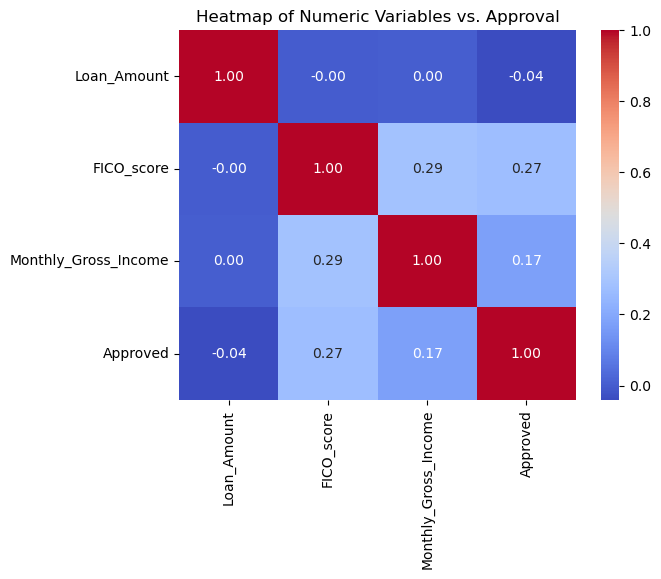

In [95]:
# Heatmap of numeric independent variables vs. approval
numeric_vars = ['Loan_Amount', 'FICO_score', 'Monthly_Gross_Income', 'Approved']
corr_matrix = df[numeric_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numeric Variables vs. Approval')
plt.show()

### Categorial variables

Categorial independent variables may also influence the approval result. By calculating the approval rate for different employment status, lender, and Ever Bankrupt or Foreclose, I found the approval rates differ accross sectors.

- **Approval Rate by Employment Status**: The approval rates vary significantly by employment status. Full-time employees have the highest approval rate at 12.07%, followed by part-time employees at 8.12%, and unemployed individuals have the lowest at 5.49%. This indicates that full-time employment is a strong positive factor in loan approval decisions.
- **Approval Rate by Lender**: Different lenders show varying approval rates; Lender C has the highest approval rate at 17.06%, significantly higher than Lender A at 10.97% and Lender B at 7.13%. This suggests that Lender C may have less stringent criteria or a different risk assessment strategy compared to the others.
- **Approval Rate by Ever Bankrupt or Foreclose**: Applicants who have never declared bankruptcy or undergone foreclosure have an approval rate of 11.15%, which is significantly higher than those who have experienced these financial setbacks, who have a much lower approval rate of 3.61%. This reflects the strong negative impact of previous financial troubles on loan approval chances.

In [96]:
# Define a function to calculate approval rate for each category
def approval_rate_by_category(category):
    grouped = df.groupby(category)['Approved'].agg(['mean', 'count']).reset_index()
    grouped.rename(columns={'mean': 'Approval Rate', 'count': 'Count'}, inplace=True)
    return grouped[[category, 'Count', 'Approval Rate']]

# Calculate approval rate for categorial variables: Employment_Status, Lender, Ever_Bankrupt_or_Foreclose
employment_status_approval = approval_rate_by_category('Employment_Status')
lender_approval = approval_rate_by_category('Lender')
ever_bankrupt_approval = approval_rate_by_category('Ever_Bankrupt_or_Foreclose')

# Print the result in tables
print("Approval Rate by Employment Status:")
print(employment_status_approval)
print("\nApproval Rate by Lender:")
print(lender_approval)
print("\nApproval Rate by Ever Bankrupt or Foreclose:")
print(ever_bankrupt_approval)

Approval Rate by Employment Status:
  Employment_Status  Count  Approval Rate
0         full_time  76530       0.120711
1         part_time  17064       0.081224
2        unemployed   6406       0.054948

Approval Rate by Lender:
  Lender  Count  Approval Rate
0      A  55000       0.109655
1      B  27500       0.071273
2      C  17500       0.170571

Approval Rate by Ever Bankrupt or Foreclose:
   Ever_Bankrupt_or_Foreclose  Count  Approval Rate
0                           0  97754       0.111453
1                           1   2246       0.036064


Having completed the initial data exploration, which involved analyzing distributions and relationships across various numeric and categorical variables, I'm now well-equipped with a clearer understanding of the underlying patterns and influences on loan approval rates. Moving forward, I will utilize logistic regression analysis to delve deeper into the specific factors that significantly predict loan approvals. 

## 3.2 Logistic Regression Model

To systematically approach logistic regression analysis, we will follow these steps to define variables, select features, and construct the model:

**Defining the Dependent Variable**: 

The dependent variable, or the variable we aim to predict, is 'Approved'. This is a binary variable indicating whether a loan application was approved (1) or not approved (0).

**Selecting Independent Variables**:

Based on the insights gained from our exploratory data analysis, I keep 8 independent variables because they could possibly influence the target variable. 

I drop 'Fico_Score_group' because it's presented by the specific score. I drop 'application' because the value for this column is 1 for all rows. I drop 'Employment_Sector' because it has empty values for unemployment and has too many categories. I drop 'bounty' because it only happens after approval.

After encoding categorial variable to dummies and dividing train and test set, I fit the logistic regression model.

In [97]:
# Define variables
y = df['Approved']
X = df.drop(['User ID','applications','Fico_Score_group','Employment_Sector','Approved','bounty'], axis=1)

# Check the X variables
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Reason                      100000 non-null  object
 1   Loan_Amount                 100000 non-null  int64 
 2   FICO_score                  100000 non-null  int64 
 3   Employment_Status           100000 non-null  object
 4   Monthly_Gross_Income        100000 non-null  int64 
 5   Monthly_Housing_Payment     100000 non-null  int64 
 6   Ever_Bankrupt_or_Foreclose  100000 non-null  int64 
 7   Lender                      100000 non-null  object
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


In [98]:
# Encode categorial variables
X = pd.get_dummies(X, columns=['Reason','Employment_Status','Lender'], dtype=int, drop_first=True)

# Add constant
X = sm.add_constant(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   const                           100000 non-null  float64
 1   Loan_Amount                     100000 non-null  int64  
 2   FICO_score                      100000 non-null  int64  
 3   Monthly_Gross_Income            100000 non-null  int64  
 4   Monthly_Housing_Payment         100000 non-null  int64  
 5   Ever_Bankrupt_or_Foreclose      100000 non-null  int64  
 6   Reason_credit_card_refinancing  100000 non-null  int64  
 7   Reason_debt_conslidation        100000 non-null  int64  
 8   Reason_home_improvement         100000 non-null  int64  
 9   Reason_major_purchase           100000 non-null  int64  
 10  Reason_other                    100000 non-null  int64  
 11  Employment_Status_part_time     100000 non-null  int64  
 12  Employment_Status

In [99]:
# Split test 20% and train 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Conduct logistic regression
model = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Approved   No. Observations:                80000
Model:                            GLM   Df Residuals:                    79985
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23237.
Date:                Tue, 07 May 2024   Deviance:                       46475.
Time:                        20:20:07   Pearson chi2:                 7.63e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1059
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -9.8018      0.127    -77.096      0.000     -10.051      -9.553
Loan_Amount                    -5.658e-06   4.35e-07    -13.015      0.000   -6.51e-06   -4.81e-06
FICO_score                         0.0119      0.000     64.926      0.000       0.012       0.012
Monthly_Gross_Income            6.595e-05   4.87e-06     13.531      0.000    5.64e-05    7.55e-05
Monthly_Housing_Payment           -0.0002   2.02e-05     -8.665      0.000      -0.000      -0.000
Ever_Bankrupt_or_Foreclose        -1.0379      0.126     -8.244      0.000      -1.285      -0.791
Reason_credit_card_refinancing     0.0466      0.040      1.152      0.249      -0.033       0.126
Reason_debt_conslidation          -0.0077      0.036     -0.210      0.834      -0.079       0.064
Reason_home_improvement            0.0053      0.046      0.117      0.907      -0.084       0.095
Reason_major_purchase             -0.0120      0.041     -0.289      0.772      -0.093       0.069
Reason_other                       0.0009      0.049      0.019      0.985      -0.095       0.097
Employment_Status_part_time       -0.3702      0.042     -8.755      0.000      -0.453      -0.287
Employment_Status_unemployed      -0.9205      0.069    -13.247      0.000      -1.057      -0.784
Lender_B                          -0.5215      0.032    -16.234      0.000      -0.585      -0.459
Lender_C                           0.8159      0.031     26.412      0.000       0.755       0.876
==================================================================================================
"""

The logistic regression analysis reveals that several variables are particularly influential in determining loan approval, indicating by the P>|z| column. We identify the variables important when this value is smaller than 0.05.

The most impactful factors include the applicant's employment status, FICO score, past bankruptcy or foreclosure history, and the specific lender. Other variables such as loan amount, monthly gross income, and monthly housing payment, although statistically significant, have a less pronounced effect on the likelihood of approval. Reason for application doesn't matter in this case.


Here are the detailed explanation for each significant variable:

- **Employment Status**:
Part-Time (-0.3702) and Unemployed (-0.9205) both significantly reduce the likelihood of loan approval, with unemployment having a more severe impact. This underscores the importance of stable employment in the loan decision process.

- **FICO Score (0.0119)**:
A higher FICO score substantially increases the chances of approval, reinforcing the role of credit history as a fundamental measure of financial health and risk.

- **Ever Bankrupt or Foreclose (-1.0379)**:
Having a history of bankruptcy or foreclosure drastically decreases the likelihood of loan approval. This highlights the critical impact of past financial behavior on lending decisions, suggesting that risk assessments could benefit from incorporating more nuanced financial recovery metrics or post-bankruptcy financial behavior analyses.

- **Loan Amount (-5.658e-06)**:
While the effect of loan amount on approval chances is slight, it is statistically significant, indicating that larger loans are slightly less likely to be approved. This could reflect an inherent risk aversion to higher amounts, suggesting that lenders might need to adjust their risk thresholds or pricing models based on loan size.

- **Lender Specific**:
Lender B (-0.5215) shows a negative influence, whereas Lender C (0.8159) has a positive influence compared to Lender A. This variation suggests that different lenders have different lending criteria or risk appetites, which could be leveraged by marketing strategies targeting specific customer segments that align better with each lender’s profile.

## 3.3 Model Evaluation

To make sure that the model performs well in predicting probability and classifiction, I use some metrics to evaluate its performance. To summary, the logistic regression model works well for both functions.

### Predicting Probability

The Log Loss of -0.2891 and an ROC AUC of 0.79 from the logistic regression model indicate that the model is proficient at predicting loan approval outcomes with a high level of accuracy in probabilistic terms. 

In [100]:
# Apply the model on test data
proba = model.predict(X_test)

In [101]:
# Log loss
logloss = log_loss(y_test, proba)
print("Log Loss:", logloss)

Log Loss: 0.28915332706623037


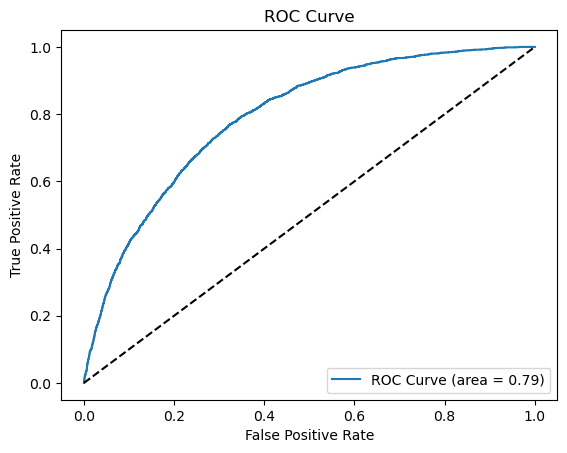

In [102]:
# Draw the ROC curve
roc_auc = roc_auc_score(y_test, proba)
fpr, tpr, thresholds = roc_curve(y_test, proba)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Classification
Using a classification threshold of 0.5, where probabilities above this value predict approval and those below predict non-approval, the model achieves an overall accuracy of 89.03%. However, it displays a conservative bias towards predicting non-approvals, evidenced by a high precision of 0.90 and recall of 0.99 for non-approvals, contrasted by a low precision of 0.47 and extremely low recall of 0.06 for approvals. 

This indicates the model effectively avoids false approvals but fails to identify a significant number of valid approvals, leading to many false negatives. Adjusting the threshold might help in achieving a better balance between recognizing true approvals and minimizing risk.

In [103]:
# Choose 0.5 as the threshold
y_pred = (proba >= 0.5).astype(int)

In [104]:
# Accuray
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("------------------------------------------------------")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("------------------------------------------------------")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8903
------------------------------------------------------
Confusion Matrix:
 [[17667   154]
 [ 2040   139]]
------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     17821
           1       0.47      0.06      0.11      2179

    accuracy                           0.89     20000
   macro avg       0.69      0.53      0.53     20000
weighted avg       0.85      0.89      0.85     20000



## 3.4 Summary

Based on the comprehensive analysis of the logistic regression model, here is a summary focusing on the effectiveness of variables, potential feature modifications, and other improvements:

**Useful and Not Useful Variables**:

- Useful Variables: FICO score and employment status have proven to be significant predictors, indicating their strong influence on loan approval decisions. Past bankruptcy or foreclosure history,the specific lender, loan amount, monthly gross income, and monthly housing payment are also useful.
- Less Useful Variables: Variables such as the specific reasons for the loan (e.g., credit card refinancing, home improvement) showed minimal influence on the outcome. The coefficient values were small, suggesting they do not significantly differentiate between approval and non-approval cases.

**Feature Modifications or Transformations**: 

- In previous analysis, I chose independent variables according to the result of data exploration and transformed categorial variables into dummies.

- I think I could improve the model using methods like scaling and normalization. Some features like Loan_Amount and Monthly_Gross_Income might benefit from scaling or normalization to better capture their effects, as their coefficients were very small, indicating a potentially disproportionate scale effect.

**Other Possible Improvements**:

- Adjusting Classification Threshold: Considering the conservative bias of the model towards predicting non-approvals, adjusting the classification threshold could help increase the recall for approvals, thereby balancing the rate of false negatives and false positives.
- Cross-validation and Regularization: Implementing cross-validation to optimize model parameters and using regularization techniques could prevent overfitting and help generalize the model better to unseen data.
- Model Complexity: Exploring more complex models or ensemble methods like Random Forests or Gradient Boosting might capture non-linear relationships and interactions between variables better than logistic regression.

# 4. Lenders Approval Rate
## 4.1 Average Approval Rate for Each Lender

After reviewing the overall model, we identified that lenders are a significant factor influencing loan approvals. Therefore, we will further dissect this dimension to explore whether different lenders exhibit distinct approval rates and behavioral patterns. By calculating the approval rate, we found that Lender C has the highest approval rate at 17.06%, significantly higher than Lender A at 10.97% and Lender B at 7.13%.

In [105]:
# Print the result calculated in part 3
print("\nApproval Rate by Lender:")
print(lender_approval)


Approval Rate by Lender:
  Lender  Count  Approval Rate
0      A  55000       0.109655
1      B  27500       0.071273
2      C  17500       0.170571


## 4.2 Descriptive Analysis for Each Lender

Before applying logistic regressions for each lender, I calculate the average numeric variables value for each lender, grouped by the result of approval or not. 

Overall, across all lenders, applicants who are approved generally have higher FICO scores and incomes but tend to borrow smaller amounts and have lower or similar monthly housing payments compared to those not approved.

For diffenrent lenders, their average values are different in terms of FICO_score, Monthly_Gross_Income, and Monthly_Housing_Payment. Especially, Lender C has the lowest value for each metric.

In [106]:
# Define lenders and numeric features
lenders = ['A', 'B', 'C']
features = ['Loan_Amount', 'FICO_score', 'Monthly_Gross_Income', 'Monthly_Housing_Payment']

# Expand the disply area for result
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Calculate average numeric value for each lenders
for lender in lenders:
    
    # Choose lender and compute the average
    df_lender = df[df['Lender'] == lender]
    average_features = df_lender.groupby('Approved')[features].mean()
    
    # Print the result
    print(f"Average Features for Lender {lender}:")
    print(average_features)
    print('\n')

Average Features for Lender A:
           Loan_Amount  FICO_score  Monthly_Gross_Income  Monthly_Housing_Payment
Approved                                                                         
0         45607.731422  621.845372           5802.614572              1677.814842
1         42417.509534  697.358481           7506.998674              1697.039794


Average Features for Lender B:
           Loan_Amount  FICO_score  Monthly_Gross_Income  Monthly_Housing_Payment
Approved                                                                         
0         45486.491778  622.429366            5836.39307              1733.769342
1         41790.816327  732.108673            8053.57602              1694.571939


Average Features for Lender C:
           Loan_Amount  FICO_score  Monthly_Gross_Income  Monthly_Housing_Payment
Approved                                                                         
0         46009.300723  615.368722           5101.539924              1443.887427
1

## 4.3 Regression Analysis for Each Lender

Since the 'Reason' variable is not significant in previous model, I drop this variable in the following analysis and apply simplified logistic regression model for each lender sector.

In [107]:
# Choose lender by filter
df_lender = df[df['Lender'] == 'A']
    
# Define dependent and independent variabls
y = df_lender['Approved']
X = df_lender[['Loan_Amount', 'FICO_score', 'Monthly_Gross_Income', 
                'Monthly_Housing_Payment','Employment_Status','Ever_Bankrupt_or_Foreclose']]
    
# Encode dummy variables
X = pd.get_dummies(X, columns=['Employment_Status'], dtype=int, drop_first=True)
X = sm.add_constant(X)

# Fit logistic regression model
model_lender_a = sm.GLM(y, X, family=sm.families.Binomial()).fit()
model_lender_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Approved   No. Observations:                55000
Model:                            GLM   Df Residuals:                    54992
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16489.
Date:                Tue, 07 May 2024   Deviance:                       32977.
Time:                        20:20:21   Pearson chi2:                 5.53e+04
No. Iterations:                     7   Pseudo R-squ. (CS):            0.08789
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -9.5656      0.147    -65.228      0.000      -9.853      -9.278
Loan_Amount                  -4.421e-06   5.14e-07     -8.603      0.000   -5.43e-06   -3.41e-06
FICO_score                       0.0109      0.000     50.883      0.000       0.010       0.011
Monthly_Gross_Income          8.235e-05   5.63e-06     14.627      0.000    7.13e-05    9.34e-05
Monthly_Housing_Payment      -2.446e-05   2.49e-05     -0.982      0.326   -7.33e-05    2.44e-05
Ever_Bankrupt_or_Foreclose      -1.4443      0.181     -7.971      0.000      -1.799      -1.089
Employment_Status_part_time     -0.2535      0.050     -5.034      0.000      -0.352      -0.155
Employment_Status_unemployed     0.3039      0.122      2.488      0.013       0.065       0.543
================================================================================================
"""

In [108]:
# Choose lender by filter
df_lender = df[df['Lender'] == 'B']
    
# Define dependent and independent variabls
y = df_lender['Approved']
X = df_lender[['Loan_Amount', 'FICO_score', 'Monthly_Gross_Income', 
                'Monthly_Housing_Payment','Employment_Status','Ever_Bankrupt_or_Foreclose']]
    
# Encode dummy variables
X = pd.get_dummies(X, columns=['Employment_Status'], dtype=int, drop_first=True)
X = sm.add_constant(X)

# Fit logistic regression model
model_lender_b = sm.GLM(y, X, family=sm.families.Binomial()).fit()
model_lender_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Approved   No. Observations:                27500
Model:                            GLM   Df Residuals:                    27492
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5181.7
Date:                Tue, 07 May 2024   Deviance:                       10363.
Time:                        20:20:21   Pearson chi2:                 1.66e+04
No. Iterations:                    25   Pseudo R-squ. (CS):             0.1280
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -15.3946      0.313    -49.253      0.000     -16.007     -14.782
Loan_Amount                  -6.113e-06   9.45e-07     -6.468      0.000   -7.96e-06   -4.26e-06
FICO_score                       0.0197      0.000     42.680      0.000       0.019       0.021
Monthly_Gross_Income          4.087e-05   1.03e-05      3.954      0.000    2.06e-05    6.11e-05
Monthly_Housing_Payment         -0.0003   4.21e-05     -6.815      0.000      -0.000      -0.000
Ever_Bankrupt_or_Foreclose     -23.5376   1.71e+04     -0.001      0.999   -3.36e+04    3.35e+04
Employment_Status_part_time     -0.5988      0.107     -5.618      0.000      -0.808      -0.390
Employment_Status_unemployed    -1.8580      0.210     -8.851      0.000      -2.269      -1.447
================================================================================================
"""

In [109]:
# Choose lender by filter
df_lender = df[df['Lender'] == 'C']
    
# Define dependent and independent variabls
y = df_lender['Approved']
X = df_lender[['Loan_Amount', 'FICO_score', 'Monthly_Gross_Income', 
                'Monthly_Housing_Payment','Employment_Status','Ever_Bankrupt_or_Foreclose']]
    
# Encode dummy variables
X = pd.get_dummies(X, columns=['Employment_Status'], dtype=int, drop_first=True)
X = sm.add_constant(X)

# Fit logistic regression model
model_lender_c = sm.GLM(y, X, family=sm.families.Binomial()).fit()
model_lender_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Approved   No. Observations:                17500
Model:                            GLM   Df Residuals:                    17492
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7007.0
Date:                Tue, 07 May 2024   Deviance:                       14014.
Time:                        20:20:22   Pearson chi2:                 1.72e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1067
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -6.7836      0.197    -34.356      0.000      -7.171      -6.397
Loan_Amount                  -6.805e-06   7.69e-07     -8.853      0.000   -8.31e-06    -5.3e-06
FICO_score                       0.0094      0.000     31.208      0.000       0.009       0.010
Monthly_Gross_Income          1.952e-05   9.46e-06      2.063      0.039    9.74e-07    3.81e-05
Monthly_Housing_Payment         -0.0003   3.43e-05     -8.630      0.000      -0.000      -0.000
Ever_Bankrupt_or_Foreclose      -0.7683      0.156     -4.913      0.000      -1.075      -0.462
Employment_Status_part_time     -0.4953      0.068     -7.298      0.000      -0.628      -0.362
Employment_Status_unemployed    -1.2961      0.084    -15.462      0.000      -1.460      -1.132
================================================================================================
"""

## 4.4 Comparison

- **Similarities**: All lenders demonstrate that a higher FICO score significantly increases the likelihood of loan approval, emphasizing the importance of creditworthiness. Additionally, employment status plays a crucial role, with unemployment generally decreasing approval odds, highlighting a preference for stable, full-time employment. Thus, they are reliable variables for all lenders.

- **Lender A**: Lender A places a significant emphasis on monthly gross income, suggesting a focus on an applicant's income stability and capacity to repay. Interestingly, unlike other lenders, being unemployed may not necessarily reduce approval chances for Lender A, indicating a unique approach to evaluating unemployed applicants. They don't consider Monthly_Housing_Payment either.

- **Lender B**: Lender B considers monthly housing payments important, where higher payments negatively affect loan approval, reflecting a concern for applicants' existing financial burdens and their overall debt-to-income ratio. What's more, they don't consider bankrupt or foreclose history.

- **Lender C**: Lender C exhibits a more conservative approach, particularly harsh towards unemployment, which significantly lowers the chances of approval more so than for other lenders, indicating a strong emphasis on employment stability and consistent income.

# 5. Customer and Lenders
## 5.1 Revenue Generated Now

According to this dataset, Bankrate can generate $2,641,500 total revenue using the original matching method.

In [110]:
total_revenue = df['bounty'].sum()
print(total_revenue)

2641500


## 5.2 When Using New Match Method

This new method is based on the following key concepts for analyzing and matching lenders with customers:

1. **Differing Behaviors of Lenders**: Each lender has different approval criteria, so the probability of the same customer being approved varies across lenders. This step predicts the approval probability for each customer with different lenders using logistic regression models.

2. **Calculating Expected Revenue**: Since each lender offers different returns to Bankrate for approved loans, the expected revenue for each loan application is calculated after determining the approval probabilities. This expected revenue is the product of the approval probability and the amount provided by the respective lender.

3. **Choosing the Optimal Lender**: Based on the calculated expected revenues, the lender offering the highest expected revenue is chosen as the best match for each loan application. This choice not only considers the likelihood of approval but also maximizes economic benefits.

Using this method, the total calculated revenue is approximately 3,555,133 dollars which 913,633 dollars higher than the original matching method's revenue. This demonstrates that through detailed analysis and optimal selection, significant improvements in economic efficiency can be achieved.

In [111]:
# Define independent variables for each customer
X = df[['Loan_Amount', 'FICO_score', 'Monthly_Gross_Income','Monthly_Housing_Payment',
        'Employment_Status','Ever_Bankrupt_or_Foreclose']]
X = pd.get_dummies(X, columns=['Employment_Status'], dtype=int, drop_first=True)
X = sm.add_constant(X)

# Predict the approval probability for each customer matched with each lender
prob_a = model_lender_a.predict(X)
prob_b = model_lender_b.predict(X)
prob_c = model_lender_c.predict(X)

# Calculated the expected revenue for matching each lender
expected_revenue_a = prob_a * 250
expected_revenue_b = prob_b * 350
expected_revenue_c = prob_c * 150

# Choose the lender with maximum expected revenue
max_revenue = np.maximum.reduce([expected_revenue_a, expected_revenue_b, expected_revenue_c])
best_lender = np.argmax([expected_revenue_a, expected_revenue_b, expected_revenue_c], axis=0)
best_lender_labels = {0: 'A', 1: 'B', 2: 'C'}
best_lender = np.vectorize(best_lender_labels.get)(best_lender)

# Add new variables to the dataframe
df['Best_Lender'] = best_lender
df['Max_Expected_Revenue'] = max_revenue

In [112]:
# Check the matching result
df[['User ID','Lender','Best_Lender','Max_Expected_Revenue']].head()

,User ID,Lender,Best_Lender,Max_Expected_Revenue
0,00007820-89cb-4c1d-9940-eb270d605a35,B,C,31.562555
1,00012b55-514c-421e-9c76-3300abbc1134,B,C,19.753105
2,000157c1-b6a3-4c86-82c7-9ec1bda3799a,A,C,25.518135
3,00020400-efab-4b10-8812-2a0aaf774841,A,C,16.322157
4,0002f737-0cda-48fb-91ed-533f3d0eab05,A,C,31.576213


In [113]:
# Compute the max revuenue
new_expected_revenue = df['Max_Expected_Revenue'].sum()

# Compute the increase
revenue_increase = new_expected_revenue - total_revenue

# Print the result
print("New expected total revenue:", new_expected_revenue)
print("Expected revenue increase:", revenue_increase)

New expected total revenue: 3555132.811131361
Expected revenue increase: 913632.8111313609


## 5.3 Other Considerations

According to the result based on our sample data, the new method works better than the original one. However, it changes the number of customers assigned to each lender. We need to consider model robustness, preference of customers, and relationship with lenders.

- **Model robustness**: To achieve accurate predictions and efficient matching, the feasibility of the model and data is crucial. First, ensure that the data is comprehensive and represents different types of customers and loan scenarios. Second, the model should be updated regularly to reflect changes in the market and new consumer behavior patterns. Additionally, the predictive accuracy of the model must be maintained through continuous testing and validation to ensure its effectiveness in practical applications.

- **Customer preference**: Understanding customer preferences is crucial for ensuring service satisfaction and enhancing customer loyalty. When using the model to match lenders, consider customers' specific needs regarding loan conditions, such as interest rates, repayment terms, and additional fees. By analyzing customers' historical behavior and feedback, the matching strategy can be further refined to ensure that the recommended lenders best meet their expectations and needs.

- **Lender relationships**: Maintaining a cooperative relationship with lenders is also an important consideration when choosing the best lender for matching. From a long-term perspective, establishing stable and mutually beneficial relationships helps ensure sustained business growth and market competitiveness. From a short-term perspective, the approval rates and flexibility of loan products offered by lenders should also be considered to respond to immediate market changes. Therefore, balancing these factors and maintaining good communication and cooperation with lenders is crucial for achieving business strategies and objectives.

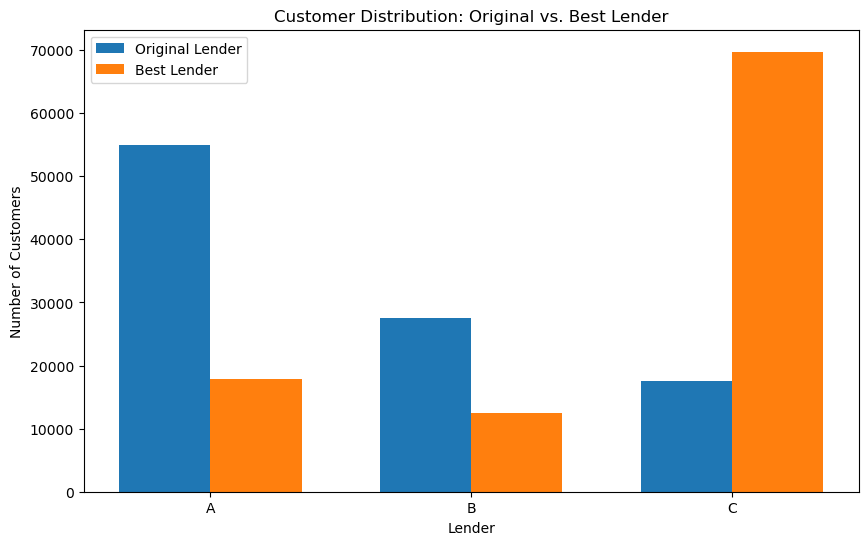

In [114]:
# Count customers for original and new lenders
original_lender_counts = df['Lender'].value_counts().reindex(['A', 'B', 'C'], fill_value=0)
best_lender_counts = df['Best_Lender'].value_counts().reindex(['A', 'B', 'C'], fill_value=0)

# order the result by lenders
original_lender_counts = original_lender_counts.sort_index()
best_lender_counts = best_lender_counts.sort_index()

# Set the position and width
bar_width = 0.35
index = np.arange(len(original_lender_counts))

# Draw the barplot
plt.figure(figsize=(10, 6))
bar1 = plt.bar(index, original_lender_counts, bar_width, label='Original Lender')
bar2 = plt.bar(index + bar_width, best_lender_counts, bar_width, label='Best Lender')
plt.xlabel('Lender')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution: Original vs. Best Lender')
plt.xticks(index + bar_width / 2, ['A', 'B', 'C'])
plt.legend()
plt.show()